### Student Information
Name: Gideon Levi 鄔培勇

Student ID: 109006114

GitHub ID: gideonlevi

Kaggle name: Gideon Levi

Kaggle private scoreboard snapshot:

[Snapshot](images/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

## 1. Take home exercises

In [1]:
### Begin Assignment Here

import pandas as pd

### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

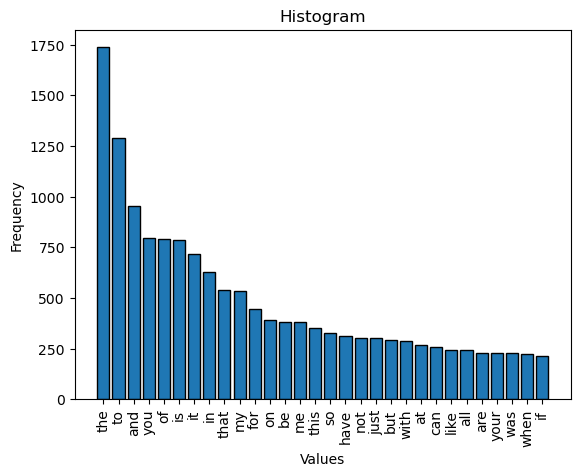

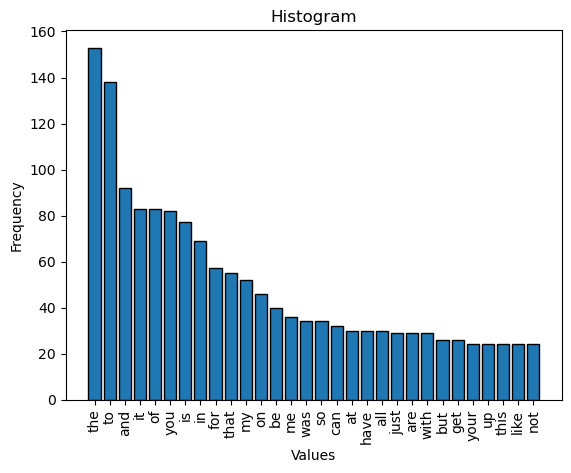

In [2]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

# Initialize count vectorizer
train_count_vect = CountVectorizer()
test_count_vect = CountVectorizer()

# Learn the vocabulary and return text-term matrix
train_df_counts = train_count_vect.fit_transform(train_df.text)
test_df_counts = test_count_vect.fit_transform(test_df.text)

# Calculate each term frequencies in all text
train_word_frequencies = np.asarray(train_df_counts.sum(axis=0))[0]
test_word_frequencies = np.asarray(test_df_counts.sum(axis=0))[0]

# Sort the word frequencies in descending order and get the indices of the top 30 words
train_top30_words_indices = np.argsort(train_word_frequencies)[::-1][:30]
test_top30_words_indices = np.argsort(test_word_frequencies)[::-1][:30]

# Obtain words names
train_top30_words = [str(train_count_vect.get_feature_names_out()[i]) for i in train_top30_words_indices]
test_top30_words = [str(test_count_vect.get_feature_names_out()[i]) for i in test_top30_words_indices]

# Obtain top 30 words frequency
train_top30_words_frequency = np.sort(train_word_frequencies)[::-1][:30]
test_top30_words_frequency = np.sort(test_word_frequencies)[::-1][:30]

# Plot the histogram
plt.bar(train_top30_words, train_top30_words_frequency, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
# Show the plot
plt.show()

# Plot the histogram
plt.bar(test_top30_words, test_top30_words_frequency, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
# Show the plot
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [3]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# Calling the TfidfVectorizer
Tfidf_1000 = TfidfVectorizer(max_features=1000)

# Apply analyzer to training data
Tfidf_1000.fit(train_df['text'])

train_data_Tfidf_features_1000 = Tfidf_1000.transform(train_df['text'])

feature_names_1000 = Tfidf_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  

![Image](../pics/confusion_matrix_plot.png)

Can you interpret the results above? What do they mean?

**Answer:** The diagonal elements of the confusion matrix represent the number of correct predictions for each class, while off-diagonal elements represent misclassifications. For example, the element on index (0, 0), 57 represents the number of text with anger emotions predicted correctly. On the other hand, the element on index (1, 0), 16 represents the number of text with fear emotions predicted as text with anger emotions by our model.
The confusion matrix can help us visualize and understand the distribution of correct and incorrect predicitons accross different classes of emotions, providing insight into the strenghts and weaknesses of our model.

---

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

c:\Users\Gideon\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)



---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [6]:
# Answer here
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

# Build Naive Bayes model
NB_model = MultinomialNB()

# Training
NB_model = NB_model.fit(X_train, y_train)

# Predict
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

# Print training and testing accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

# Print testing results
print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

**Answer:**
- Both models have comparable testing accuracies, suggesting that they perform similarly on the test dataset.
- The Decision Tree model tends to have slightly higher precision and recall values for most classes compared to the Naive Bayes model.
- Decision Trees are known for capturing complex relationships in the data, possibly explaining the higher performance in this case. However, Decision Trees are also prone to overfitting, so the training accuracy (0.99) being much higher than the testing accuracy (0.66) may indicate overfitting.
- Naive Bayes models are simpler and make the assumption of independence among features. They may not capture complex relationships as well as Decision Trees but are less prone to overfitting. This can be seen from the relatively small difference between training accuracy (0.79) and testing accuracy (0.7).

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="../pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

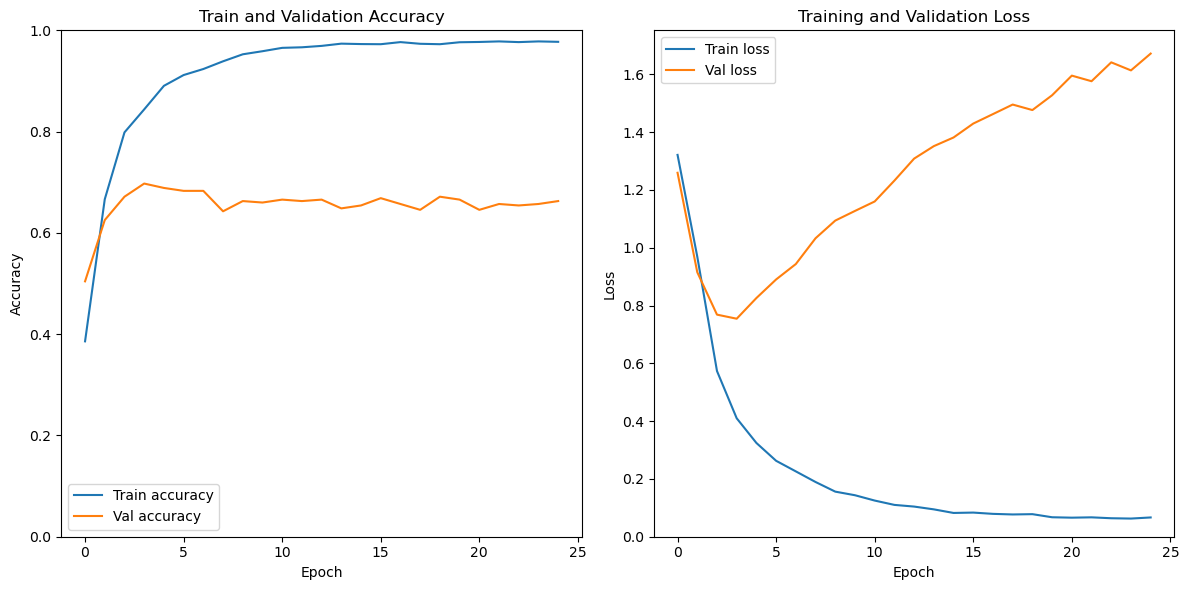

In [5]:
# Answer here
# Read training log
training_log = pd.DataFrame()
training_log = pd.read_csv("../logs/training_log.csv")

# Plotting Training and Validation Loss
plt.figure(figsize=(12, 6))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], label='Train loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0)
plt.legend()


plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()

**Answer:**

From the the plot which shows us the train and validation accuracy per epoch we can see that difference between train accuracy and validation accuracy is increasing starting from epoch 2, and remains large from around epoch 3. We can also observe the same large difference in the train loss and validation loss in the plot that contains train loss and validation loss per epoch. These observations suggest that the model used here have overfitting problem that might cause the model to be good when predicting seen data but not for unseen data.

---

In [16]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912951469421),
 ('overjoyed', 0.6599285006523132),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.6360421180725098),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269948482513428),
 ('excited', 0.6247665882110596)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [32]:
# Answer here

def sentence_vector(sentence):
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)

    # Get the word vectors for each word in the sentence
    vectors = [w2v_google_model[word] for word in words if word in w2v_google_model]

    if not vectors:
        # If none of the words in the sentence have vectors, return a zero vector
        return np.zeros(w2v_google_model.vector_size)

    # Calculate the mean of the word vectors to obtain the sentence vector
    sentence_vector = np.mean(vectors, axis=0)
    return sentence_vector

# Example sentences
sentence1 = "This is an example sentence."
sentence2 = "Another example sentence for demonstration."

# Get sentence vectors for the example sentences
vector1 = sentence_vector(sentence1)
vector2 = sentence_vector(sentence2)

In [53]:
# Apply the sentence_vector function to the 'text' column
train_df['text_vectors'] = train_df['text'].apply(sentence_vector)
test_df['text_vectors'] = test_df['text'].apply(sentence_vector)

# Extract features (X) and labels (y) for training and testing
X_train = np.vstack(train_df['text_vectors'].to_numpy())
y_train = train_df['emotion']

X_test = np.vstack(test_df['text_vectors'].to_numpy())
y_test = test_df['emotion']
## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 300)
y_train.shape:  (3613,)
X_test.shape:  (347, 300)
y_test.shape:  (347,)


In [58]:
# Apply the sentence_vector function to the 'text' column
train_df['text_vectors'] = train_df['text'].apply(sentence_vector)
test_df['text_vectors'] = test_df['text'].apply(sentence_vector)

# Extract features (X) and labels (y) for training and testing
X_train = np.vstack(train_df['text_vectors'].to_numpy())
y_train = train_df['emotion']

X_test = np.vstack(test_df['text_vectors'].to_numpy())
y_test = test_df['emotion']

from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = dt_model.predict(X_train)
# Make predictions on the test set
y_test_pred = dt_model.predict(X_test)

# Evaluate the accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

# Evaluate precision, recall, f1-score of testing results
print(classification_report(y_true=y_test, y_pred=y_test_pred))

Accuracy: 0.345821325648415
training accuracy: 0.99
testing accuracy: 0.35
              precision    recall  f1-score   support

       anger       0.27      0.25      0.26        84
        fear       0.43      0.43      0.43       110
         joy       0.39      0.39      0.39        79
     sadness       0.26      0.28      0.27        74

    accuracy                           0.35       347
   macro avg       0.34      0.34      0.34       347
weighted avg       0.35      0.35      0.35       347



In [59]:
from sklearn.preprocessing import MinMaxScaler
# Apply the sentence_vector function to the 'text' column
train_df['text_vectors'] = train_df['text'].apply(sentence_vector)
test_df['text_vectors'] = test_df['text'].apply(sentence_vector)

# Scale the sentence vectors to ensure non-negativity
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(np.vstack(train_df['text_vectors'].to_numpy()))
X_test_scaled = scaler.transform(np.vstack(test_df['text_vectors'].to_numpy()))

# Convert the scaled vectors to integers (counts or frequencies)
X_train_counts = np.round(X_train_scaled * 10)  # Adjust the multiplier as needed
X_test_counts = np.round(X_test_scaled * 10)

# Train a Multinomial Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train_counts, y_train)

# Predict
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

# Print training and testing accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

# Evaluate precision, recall, f1-score of testing results
print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.33
testing accuracy: 0.32
              precision    recall  f1-score   support

       anger       1.00      0.01      0.02        84
        fear       0.32      1.00      0.48       110
         joy       0.00      0.00      0.00        79
     sadness       0.00      0.00      0.00        74

    accuracy                           0.32       347
   macro avg       0.33      0.25      0.13       347
weighted avg       0.34      0.32      0.16       347



c:\Users\Gideon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Gideon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Gideon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# or using gensim #

import gensim.downloader as api
glove_twitter_25_model = api.load("glove-twitter-25")

sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president = 'The president greets the press in Chicago'.lower().split()
similarity = glove_twitter_25_model.wmdistance(sentence_obama, sentence_president)
print(f"{similarity:.4f}")

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [13]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = angry_words + happy_words + sad_words + fear_words

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

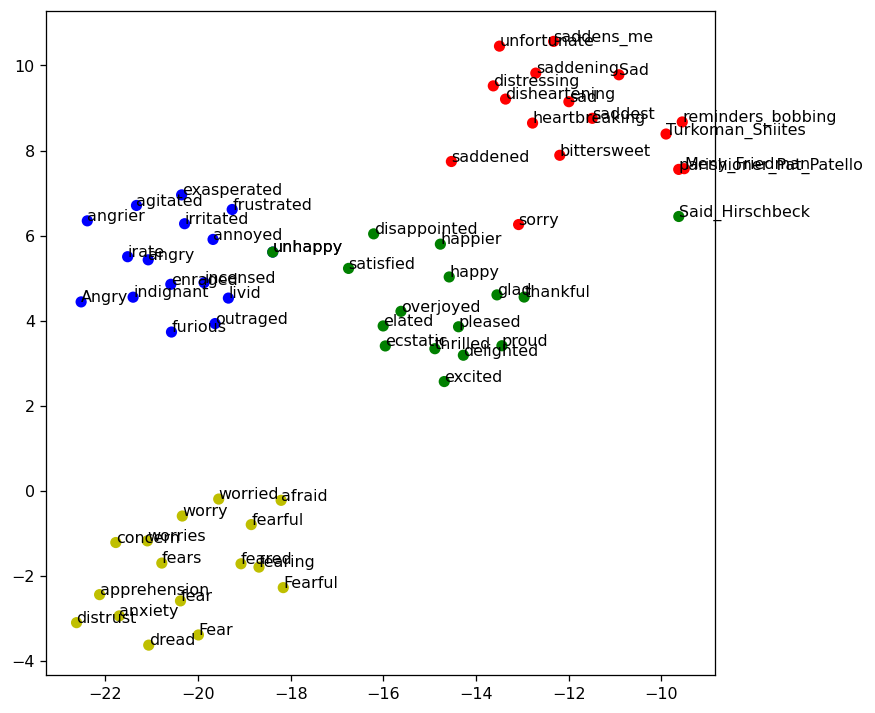

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## 3. Kaggle Emotion Recognition Competition

Since emotion recognition model involves intensive computation and often requires the use of GPU resources, I've chosen to develop my model on Google Colab. As a result, the code provided below are not executable locally.

[Code file](./datamining_lab2_distilBERT_fine_tuning.ipynb)

Below are the explanation of my code amd report of my work.

### Import libraries

- Firstly, I imported libraries needed for my implementation.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

### Data Preparation

- Here I loaded two CSV files, namely 'data_identification.csv' containing tweet IDs and 'emotion.csv' with corresponding emotions for the tweets. Subsequently, I combined them into a Pandas DataFrame based on the tweet IDs.

In [ ]:
drive.mount('/content/gdrive/')
# Read csv data
data_identification = pd.read_csv("/content/gdrive/MyDrive/data_identification.csv")
data_emotion = pd.read_csv("/content/gdrive/MyDrive/emotion.csv")

# Merge data_identification and data_emotion based on tweet id
merged_data = pd.merge(data_identification, data_emotion, on=['tweet_id'], how='left')
merged_data.rename(columns={'emotion':'label'}, inplace=True)

In [ ]:
merged_data.head()

output:
tweet_id	identification	label
0	0x28cc61	test	NaN
1	0x29e452	train	joy
2	0x2b3819	train	joy
3	0x2db41f	test	NaN
4	0x2a2acc	train	trust

- Additionaly, I also loaded and parsed the 'tweets_DM.json' data to retrieved the text content of each tweets. Once the text for all tweets was sucessfully obtained, I converted them to pandas DataFrame and merge them to the previously made 'merged_data' based on the tweet IDs.

In [74]:
import json
import pandas as pd

# Specify the path to your JSON file
file_path = '/content/gdrive/MyDrive/tweets_DM.json'

# Initialize lists to store data
tweet_ids = []
texts = []

# Read the JSON data from the file
with open(file_path, 'r') as file:
    data_lines = file.readlines()

# Process each line
for line in data_lines:
    try:
        # Parse the JSON using a custom object hook
        data = json.loads(line, object_hook=lambda d: {k: v if not isinstance(v, list) or len(v) > 0 else None for k, v in d.items()})

        # Extract the required fields
        tweet_id = data.get('_source', {}).get('tweet', {}).get('tweet_id', None)
        text = data.get('_source', {}).get('tweet', {}).get('text', None)

        # Append data to lists
        tweet_ids.append(tweet_id)
        texts.append(text)
    except json.JSONDecodeError:
        # Handle invalid JSON entries
        print(f"Skipping invalid JSON entry: {line.strip()}")

# Create a Pandas DataFrame
df = pd.DataFrame({
    'tweet_id': tweet_ids,
    'text': texts
})

# Merge df to merged_data based on tweet id
merged_data = pd.merge(merged_data, df, on=['tweet_id'], how='left')

In [ ]:
merged_data.head()

output:

tweet_id	identification	label	text
0	0x28cc61	test	NaN	@Habbo I've seen two separate colours of the e...
1	0x29e452	train	joy	Huge Respect🖒 @JohnnyVegasReal talking about l...
2	0x2b3819	train	joy	Yoooo we hit all our monthly goals with the ne...
3	0x2db41f	test	NaN	@FoxNews @KellyannePolls No serious self respe...
4	0x2a2acc	train	trust	@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...

### Data Preprocessing

- To preprocess the data, I utilized label encoding to convert the provided string-based labels into numerical values and employed tokenization to break down the text content, aiding the model in better understanding and analyzing the textual data. Additionally, I combined the dataframes into Hugging Face's dataset format since I plan to utilize a DistilBERT model. Notice that I applied tokenization after transforming the dataframes into the Hugging Face dataset structure.

In [ ]:
# Separate merged_data to training and test data
train_data = merged_data[merged_data['identification'] == 'train']
test_data = merged_data[merged_data['identification'] == 'test']

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Generate encoded label
numerical_labels = label_encoder.fit_transform(train_data['label'])

# Overwrite the string label to encoded label
train_data['label'] = numerical_labels

# To see the mapping between original labels and numerical values, you can use classes_ attribute
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

In [ ]:
train_data.head()

output:
tweet_id	label	text
1	0x29e452	4	Huge Respect🖒 @JohnnyVegasReal talking about l...
2	0x2b3819	4	Yoooo we hit all our monthly goals with the ne...
4	0x2a2acc	7	@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...
5	0x2a8830	4	Come join @ambushman27 on #PUBG while he striv...
6	0x20b21d	1	@fanshixieen2014 Blessings!My #strength little...

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting train_data to train_data and val_data
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [ ]:
# Save tweets id
train_tweet_id = train_data['tweet_id']
val_tweet_id = val_data['tweet_id']
test_tweet_id = test_data['tweet_id']

# Drop tweets id from dataset
train_data.drop(['tweet_id'], axis=1, inplace=True)
val_data.drop(['tweet_id'], axis=1, inplace=True)
test_data.drop(['tweet_id'], axis=1, inplace=True)

In [ ]:
print('Dataset information:')
print(f'Training data: {train_data.shape}')
print(f'Validation data: {val_data.shape}')
print(f'Test data: {test_data.shape}')

output:
Dataset information:
Training data: (1164450, 2)
Validation data: (291113, 2)
Test data: (411972, 2)

- Combine pandas DataFrames into HuggingFace's Dataset

In [ ]:
pip install datasets

In [ ]:
from datasets import Dataset,DatasetDict,Features,Value,ClassLabel

# Drop the index column if it's present
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
val_data['label'].fillna('-1', inplace=True)

# Don't forget the class label data
class_names = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
ft = Features({'text': Value('string'), 'label': ClassLabel(names=class_names)})

# Combine Multiple Datasets
emotions = DatasetDict({
    "train": Dataset.from_pandas(train_data,features=ft),
    "validation": Dataset.from_pandas(val_data,features=ft),
    "test": Dataset.from_pandas(test_data,features=ft)
    })

In [ ]:
emotions

output:
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1164450
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 291113
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 411972
    })
})

- Tokenization

In [ ]:
from transformers import AutoTokenizer

# Load parameters of the tokeniser
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
# Show tokeniser information
tokenizer

output:
DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
# Tokenisation function
def tokenise(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

# apply to the entire dataset (train,test and validation dataset)
emotions_encoded = emotions.map(tokenise, batched=True, batch_size=100000)

In [ ]:
print(emotions_encoded["train"].column_names)

output:
['text', 'label', 'input_ids', 'attention_mask']

### Building and Training Model

- For this emotion recognition task, I decided to use distilBERT, which is a variant of a transformer based model BERT, and fine-tuned it. The main advantage of distilBERT is that it is much smaller and efficient than BERT, but is able to achieve comparable performance. 

In [ ]:
! pip install -U accelerate
! pip install -U transformers

- Here I loaded the distilBERT model from transformers library.

In [ ]:
from transformers import AutoModelForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from transformers import Trainer, TrainingArguments

# Load a pretrained model
num_labels = 8
model_ckpt = "distilbert-base-uncased"
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

- I also defined the performance metrics of the model training to be accuracy score and macro f1 score.

In [ ]:
# Performance metrics
from sklearn.metrics import accuracy_score, f1_score

# Define performance metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    macro_f1 = f1_score(labels, preds, average="macro")  # set to 'macro'
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "macro_f1": macro_f1}  # set to 'macro_f1'

- Here I defined the training parameters of the model.

In [ ]:
bs = 64 # batch size
logging_steps = len(emotions_encoded["train"]) // bs
model_name = f"{model_ckpt}-finetuned-emotion"

# Define training arguments
training_args = TrainingArguments(output_dir=model_name,
                                  logging_dir="./logs",
                                  num_train_epochs=3,  # train for 3 epochs
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=bs,
                                  per_device_eval_batch_size=bs,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  report_to="none",
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

- Build the trainer model and train it.

In [ ]:
import os
from transformers import Trainer
os.environ['WANDB_DISABLED'] = 'true'

# Initialize trainer class model
trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset = emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)

# Train model
trainer.train()

In [ ]:
output:
Epoch Training_Loss Validation_Loss Accuracy Macro_F1
1        1.084300    0.994534    0.640174    0.554589
2        0.967300    0.955632    0.654296    0.572199
3        0.831500    0.953670    0.657088    0.576137

Predict Test Data

In [ ]:
# Save the model
trainer.save_model()

In [ ]:
from transformers import pipeline

# load from previously saved model
classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-emotion")

# Predict test data
preds = classifier(emotions_encoded["test"]["text"])
preds

In [ ]:
# Extract only the label numbers
y_preds = [int(prediction['label'].split('_')[1]) for prediction in preds]

class_mapping = {0: 'anger', 1: 'anticipation', 2: 'disgust', 3: 'fear',
                 4: 'joy', 5: 'sadness', 6: 'surprise', 7: 'trust'}

# Convert list of numbers to list of class names
y_preds = [class_mapping[pred] for pred in y_preds]

# Create submission dataframe
sub_df = pd.DataFrame({'tweet_id': test_tweet_id, 'prediction': y_preds})

In [ ]:
# Rename the columns
sub_df.rename(columns={'tweet_id':'id', 'prediction':'emotion'}, inplace=True)
# Reset the index, removing the current index
sub_df = sub_df.reset_index(drop=True)

In [ ]:
# Convert submission dataframe to csv
sub_df.to_csv("/content/gdrive/MyDrive/submission_3.csv", index=False)

### Different things I tried

- **Word2Vec + XGBoost**

I tried to use gradient boosting algorithm XGBoost, combined with Word2Vec to classify the emotion of a certain tweet text.

To implement this method I applied a few preprocessing techniques to the text content of the tweets such as tokenization, remove stop words, and remove special characters and numbers. I also applpied label encoding to the emotion label feature to enable the model to understand the label. Additionaly, I used pre-trained model to vectorize the tokenized words of the text. Initially I tried to use the Word2Vec model from google provided in the Lab2_Master notebook, but it turned out the vectorized words produced from this model is too big to be executed in google colab, so I opted for the 'glove-twitter-25' from gensim api instead. 

I made these Word2Vec vectors to be the features of my data, and trained my model. To optimize each of the model’s performance, we used scikit-learn’s GridSearchCV to perform an exhaustive grid search for hyperparameter tuning. But after training for some time I realized this method's performance is not too good as it only scored around 0.28 macro-f1 score, and 0.3 at best. So I opted out on this methods.

[Code file](./datamining_lab2_xgboost.ipynb)

- **Transformers as feature extractors**

Instead of training the pretrained model end-to-end and subsequently updates the parameters of the pretrained model  (fine-tuning), I use the hidden states as fixed features and just train the classifier on them, without modifying the pretrained model.

To implement this method, I use another auto class similar to 'AutoTokenizer' called 'AutoModel', which has method 'from_pretrained' method to load weights of a pretrained model. 'AutoModel' class converts the token encodings to embeddings & feeds them through the encoder stack to return the hidden states. Depending on the model configuration, the model can contain several objects like hidden states, losses, attentions, etc. But the model I used (distilbert-base-uncased) returns only one attribute, which is the last hidden state. Once we have the hidden states associated with each tweet, we can train the classifier. I tried to use these hidden states to train a logistic regression model, but the result is only a little bit better than random classifier with only 0.21148 f1-score on validation data. Because of the very low f1-score I decided to abandon this method.

[Code file](./datamining_lab2_distilBERT_feature_extraction.ipynb)

- **Random undersampling**

![Emotion Distribution](./images/distribution.png)

From the emotion distriution plot above, we can see that the emotion classes are imbalanced, which causes the model to be a little bit biased to emotion class with more proportion as we can see in the image below which is the confusion matrix of the validation prediction.

![Confusion Matrix 1](./images/confusion_matrix_1.png)

To tackle this problem, I applied random undersampling to the dataset using imblearn library before passing it to the model for training (fine-tuning distilBERT here). With random undersampling, the balance of the predictions got better in such way that its accuracy on originally less frequent emotion classes is getting higher, but it also have a tradeoff such that its prediction on originally more frequent emotion classes is getting less accurate than when random undersampling is not used, so the overall accuracy doesn't change or even lower a little bit. Because of this reason, I decided to also not use this method.

![Confusion Matrix](./images/confusion_matrix_2.png)

### Insights

- **NLP model have the advantage in this task.**

Although XGBoost is a versatile machine learning model that can be applied to a wide range of tasks, but it is not an NLP-specifil model which often involve the use of dedicated neural network architectures designed for processing and understanding language. Because of this there are certain limitations of XGBoost model in this type of task, no matter how well we implement it. DistilBERT, on the other hand, is a specific NLP model. It is a variant of BERT, which is a transformer-based models that have demonstrated state-of-the-art results on various NLP tasks.

- **Data size matters**

Because the dataset provided here is quite large and training takes a considerably long time, I tried to sample the train data to a fraction of it. But the performance of the model trained on the sampled data is significantly lower than the performance of the model trained on all data. For example, the macro f1 score of fine-tuning distilBERT model trained on complete data for 3 epoch is 0.576137, and the macro f1 score of the same model trained on half the data for 3 epoch is only 0.485273. From these experiments I learned that for machine learning models, especially in NLP tasks, having a larger dataset significantly enhances the model's language understanding, allowing it to capture patterns and context more effectively.  